In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import fftpack
from shutil import copyfile
import time
import os

In [8]:

def readImage(image_name):
    image = cv2.imread(image_name)
    return image
##

def fft(channel):
    fft = np.fft.fft2(channel)
    fshift = np.fft.fftshift(fft)
    
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    magnitude_spectrum = highPassFilter(magnitude_spectrum)
    return magnitude_spectrum
##

def highPassFilter(input):
    output = np.zeros((len(input),len(input[0])))
    
    rows, cols = len(input), len(input[0])
    center_row, center_col = int(rows/2), int(cols/2)
    sigma = 20
    
    mask_circle = np.ones((rows,cols), np.uint8)

    for i in range (center_row-sigma,center_row+sigma):
        for j in range (center_col-sigma,center_col+sigma):
            
            distance = np.sqrt((center_row - i)**2 + (center_col - j)**2)
            
            if (distance < sigma):
                mask_circle[i,j] = 0
            ##
    ##

##    a, b = center_row, center_col
##    r = sigma
##    n = r*2+1
##
##    x, y = np.ogrid[-a:n-a, -b:n-b]
##    circle = x*x + y*y <= r*r
##    circle=int(circle*255)
##    print(circle[30,30])
##    print(len(circle))
##    print(len(circle[0]))
##    mask_circle[circle]=0
    
    output= input*mask_circle
    
    return output
##

def cart2pol(input):
    
    binary = np.zeros((len(input),len(input[0])))
    binarySpect = np.zeros((len(input),len(input[0])))
    
    angle = np.zeros((360,1))
    thrsh = 200
    
    for i in range (0,len(input)):
        for j in range (0,len(input[0])):
            if (input[i,j] > thrsh):
                binarySpect[i,j] = input[i,j]
                binary[i,j] = 1
                
    ##
    
    #Coodrinate origin
    x0 = int(len(input)/2)
    y0 = int(len(input[0])/2)
    
    for i in range (0,len(input)):
        for j in range (0,len(input[0])):
            if (binary[i,j]==1):
                ind=int(np.arctan2(y0-j,x0-i) * 180 / np.pi)+90
                #print(ind)
                angle[ind]=angle[ind]+1
    ##
    
    return angle, binarySpect
##

def meanFilterHistogram(input, kernel_size):
    output = input.copy()
    n = int(kernel_size/2)
    for i in range (kernel_size,len(input)-kernel_size):
        output[i] = (input[i-n:i+n].sum())/kernel_size 
    ##
    
    return output
##

def DEV_drawGui(original_image, fft, result_image):
    plt.subplot(131),plt.imshow(original_image, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(fft, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(result_image, cmap = 'gray')
    plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    return 1
##


Reading...:cps201004281332.ppm


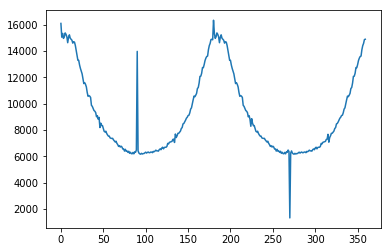

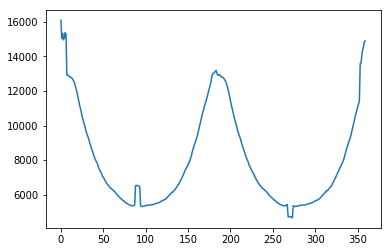

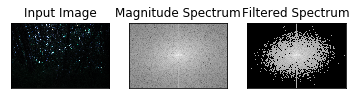

Reading...:cps201004281452.ppm


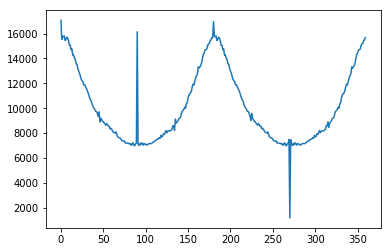

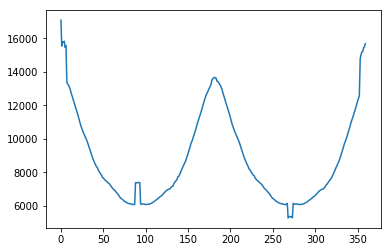

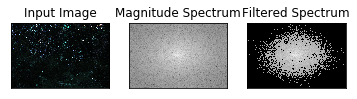

Reading...:cps201004281415.ppm


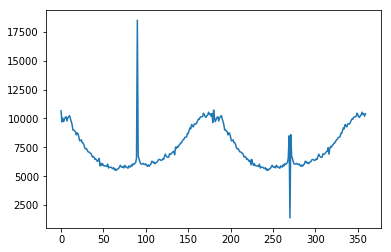

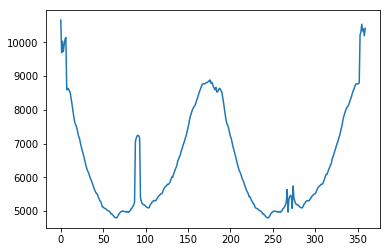

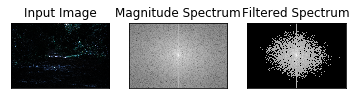

Reading...:cps201004281367.ppm


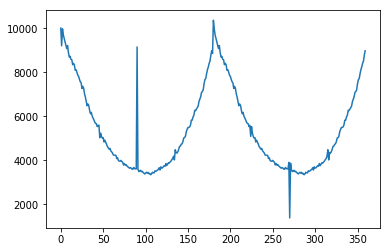

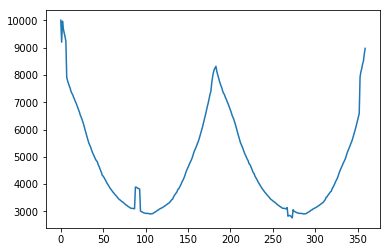

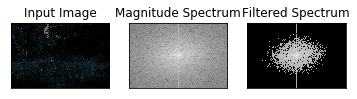

Reading...:cps201004281323.ppm


KeyboardInterrupt: 

In [9]:

def main():
    directory='Dataset/NaturalScenesTrain'
#    filename='10.ppm'    
#    image_name = filename
#    print(filename)
#    original_image = readImage(image_name)
        
#    result_array = np.zeros_like(original_image)
    
#    gray_img = cv2.cvtColor(np.array(original_image), cv2.COLOR_BGR2GRAY)
#    result_array = fft(gray_img)
#    result_image = Image.fromarray(result_array)
        
#    binary_image = Image.fromarray(cart2pol(result_array,filename))
    
#    DEV_drawGui(original_image, binary_image)
    start=time.time()
    
    for filename in os.listdir(directory):
        copyfile(directory+'/'+filename, filename)
        #filename='3.ppm'    
        image_name = filename
        print('Reading...:'+filename)
        original_image = readImage(image_name)
        
        result_array = np.zeros_like(original_image)
    
        gray_img = cv2.cvtColor(np.array(original_image), cv2.COLOR_BGR2GRAY)
        result_array = fft(gray_img)
        result_image = Image.fromarray(result_array)
        
        angles, binary_image = cart2pol(result_array)
        filteredAngles = meanFilterHistogram(angles,7)
    
    
    
        plt.plot(angles)
        plt.show()
        plt.plot(filteredAngles)
        plt.savefig(filename+'_hist'+'.png')
        plt.show()
    
        DEV_drawGui(original_image, result_image, Image.fromarray(binary_image))
        os.remove(filename) 
    end=time.time()
    print('Execution_time: %f'%(end-start))
    return 1
##

main()